<a href="https://colab.research.google.com/github/SyabanBarokahNurIlahi/Machine-Learning/blob/main/Padi_Sumatera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
padi=pd.read_csv('Padi.csv')

In [ ]:
padi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [ ]:
padi.head(10)

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31
5,Aceh,1998,1404580.0,365892.0,1465.0,82.60,26.84
6,Aceh,1999,1478712.0,359817.0,1778.0,82.79,26.14
7,Aceh,2000,1486909.0,336765.0,1974.7,90.60,27.10
8,Aceh,2001,1547499.0,295212.0,1688.7,69.48,28.90
9,Aceh,2002,1314165.0,315131.0,1296.8,68.75,29.20


In [ ]:
#memisahkan atribut dngn label
X = padi[['Provinsi','Tahun','Produksi','Luas Panen','Curah hujan','Kelembapan','Suhu rata-rata']] #atribut
y = padi['Provinsi'] #label

#membagi data set menjadi data latih dan dta uji
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#membuat model decison 3
tree_model = DecisionTreeClassifier()

#melatih model menggunakan data latih
tree_model = tree_model.fit(X_train_encoded, y_train)

In [ ]:
# Encode X_test
X_test_encoded = pd.get_dummies(X_test)

# Pastikan kolom yang di-encode dalam X_train juga ada dalam X_test
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0

# Lakukan prediksi dengan model dan X_test_encoded yang telah Anda siapkan
y_pred = tree_model.predict(X_test_encoded)

# Evaluasi model
acc_score = round(accuracy_score(y_pred, y_test), 3)
print('Accuracy:', acc_score)

Accuracy: 1.0


In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(tree_model,
                out_file="padi_eda.dot",
                feature_names=X_train_encoded.columns,
                class_names=tree_model.classes_,
                rounded=True,
                filled=True)

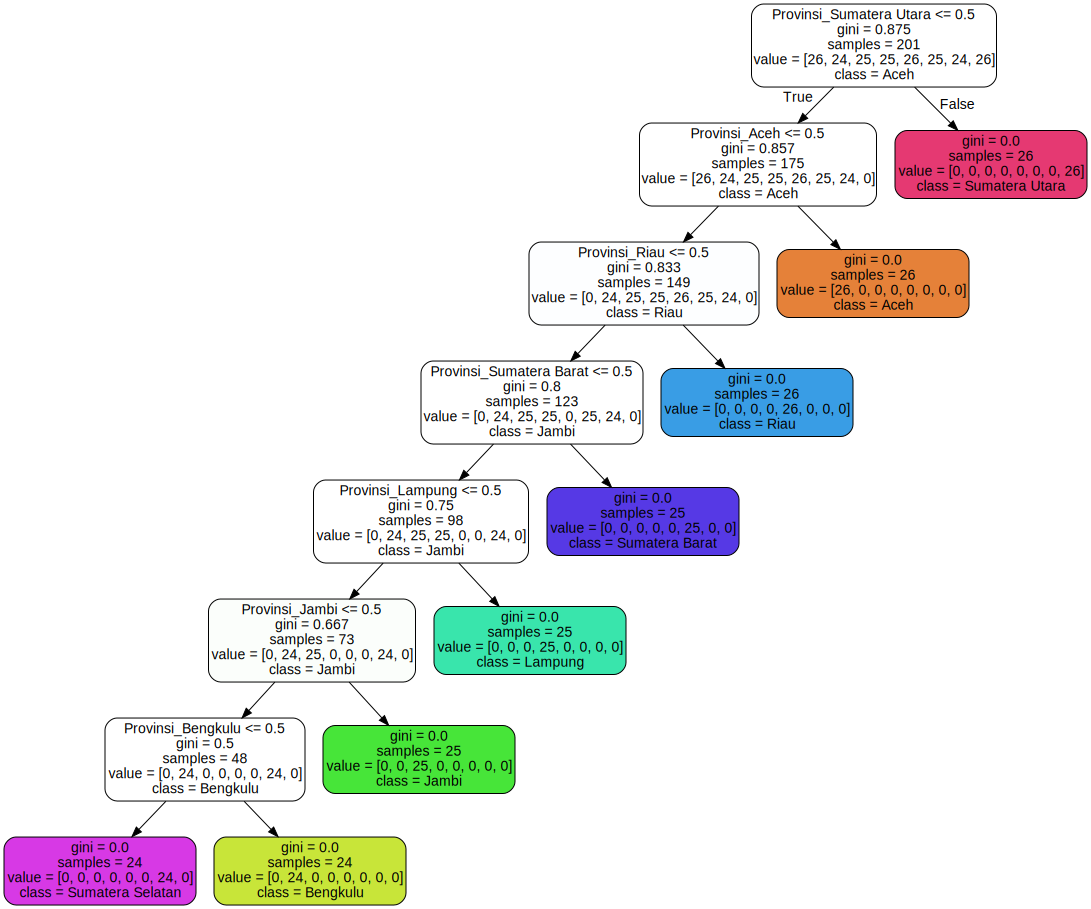

In [ ]:
# Konversi file .dot menjadi gambar
import graphviz
with open("padi_eda.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
# Simpan gambar sebagai file
graph = graphviz.Source(dot_graph)
graph.render(filename='decision_tree', format='png', cleanup=True)

'decision_tree.png'